In [2]:
import os
os.chdir("/Users/darshmac/Documents/cdac/For DBDA/PML/Cases/Glass Identification")

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [27]:
from sklearn.metrics import accuracy_score,log_loss

In [56]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [43]:
glass = pd.read_csv("Glass.csv")
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,building_windows_float_processed
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,building_windows_float_processed
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,building_windows_float_processed
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,building_windows_float_processed
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,building_windows_float_processed
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,headlamps
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,headlamps
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,headlamps
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,headlamps


In [46]:
glass['Type'].unique()

array(['building_windows_float_processed',
       'building_windows_non_float_processed',
       'vehicle_windows_float_processed', 'containers', 'tableware',
       'headlamps'], dtype=object)

In [48]:
glass['Type'].nunique()

6

In [30]:
X = glass.drop("Type",axis=1)

In [31]:
y = glass['Type']

###### Label Encoding

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
le = LabelEncoder()

In [51]:
le_y = le.fit_transform(y)
print(le.classes_)

['building_windows_float_processed' 'building_windows_non_float_processed'
 'containers' 'headlamps' 'tableware' 'vehicle_windows_float_processed']


In [70]:
# Print the mapping of labels to categories
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", label_mapping)

Label Mapping: {'building_windows_float_processed': 0, 'building_windows_non_float_processed': 1, 'containers': 2, 'headlamps': 3, 'tableware': 4, 'vehicle_windows_float_processed': 5}


In [32]:
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=23)

In [37]:
params = {'min_samples_split':[2,5,10,20,60,80,100],
         'max_depth':[3,4,5,6,7,None],
         'min_samples_leaf':[1,5,10,20]}

In [38]:
dtc = DecisionTreeClassifier(random_state=23)

In [39]:
gcv = GridSearchCV(dtc,param_grid=params,cv=kfold,scoring='neg_log_loss')

In [52]:
gcv.fit(X,le_y)
#gcv.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=23),
             param_grid={'max_depth': [3, 4, 5, 6, 7, None],
                         'min_samples_leaf': [1, 5, 10, 20],
                         'min_samples_split': [2, 5, 10, 20, 60, 80, 100]},
             scoring='neg_log_loss')

In [42]:
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 100}
-1.8692331064846457


In [54]:
#plotting best tree
bm_tree = gcv.best_estimator_

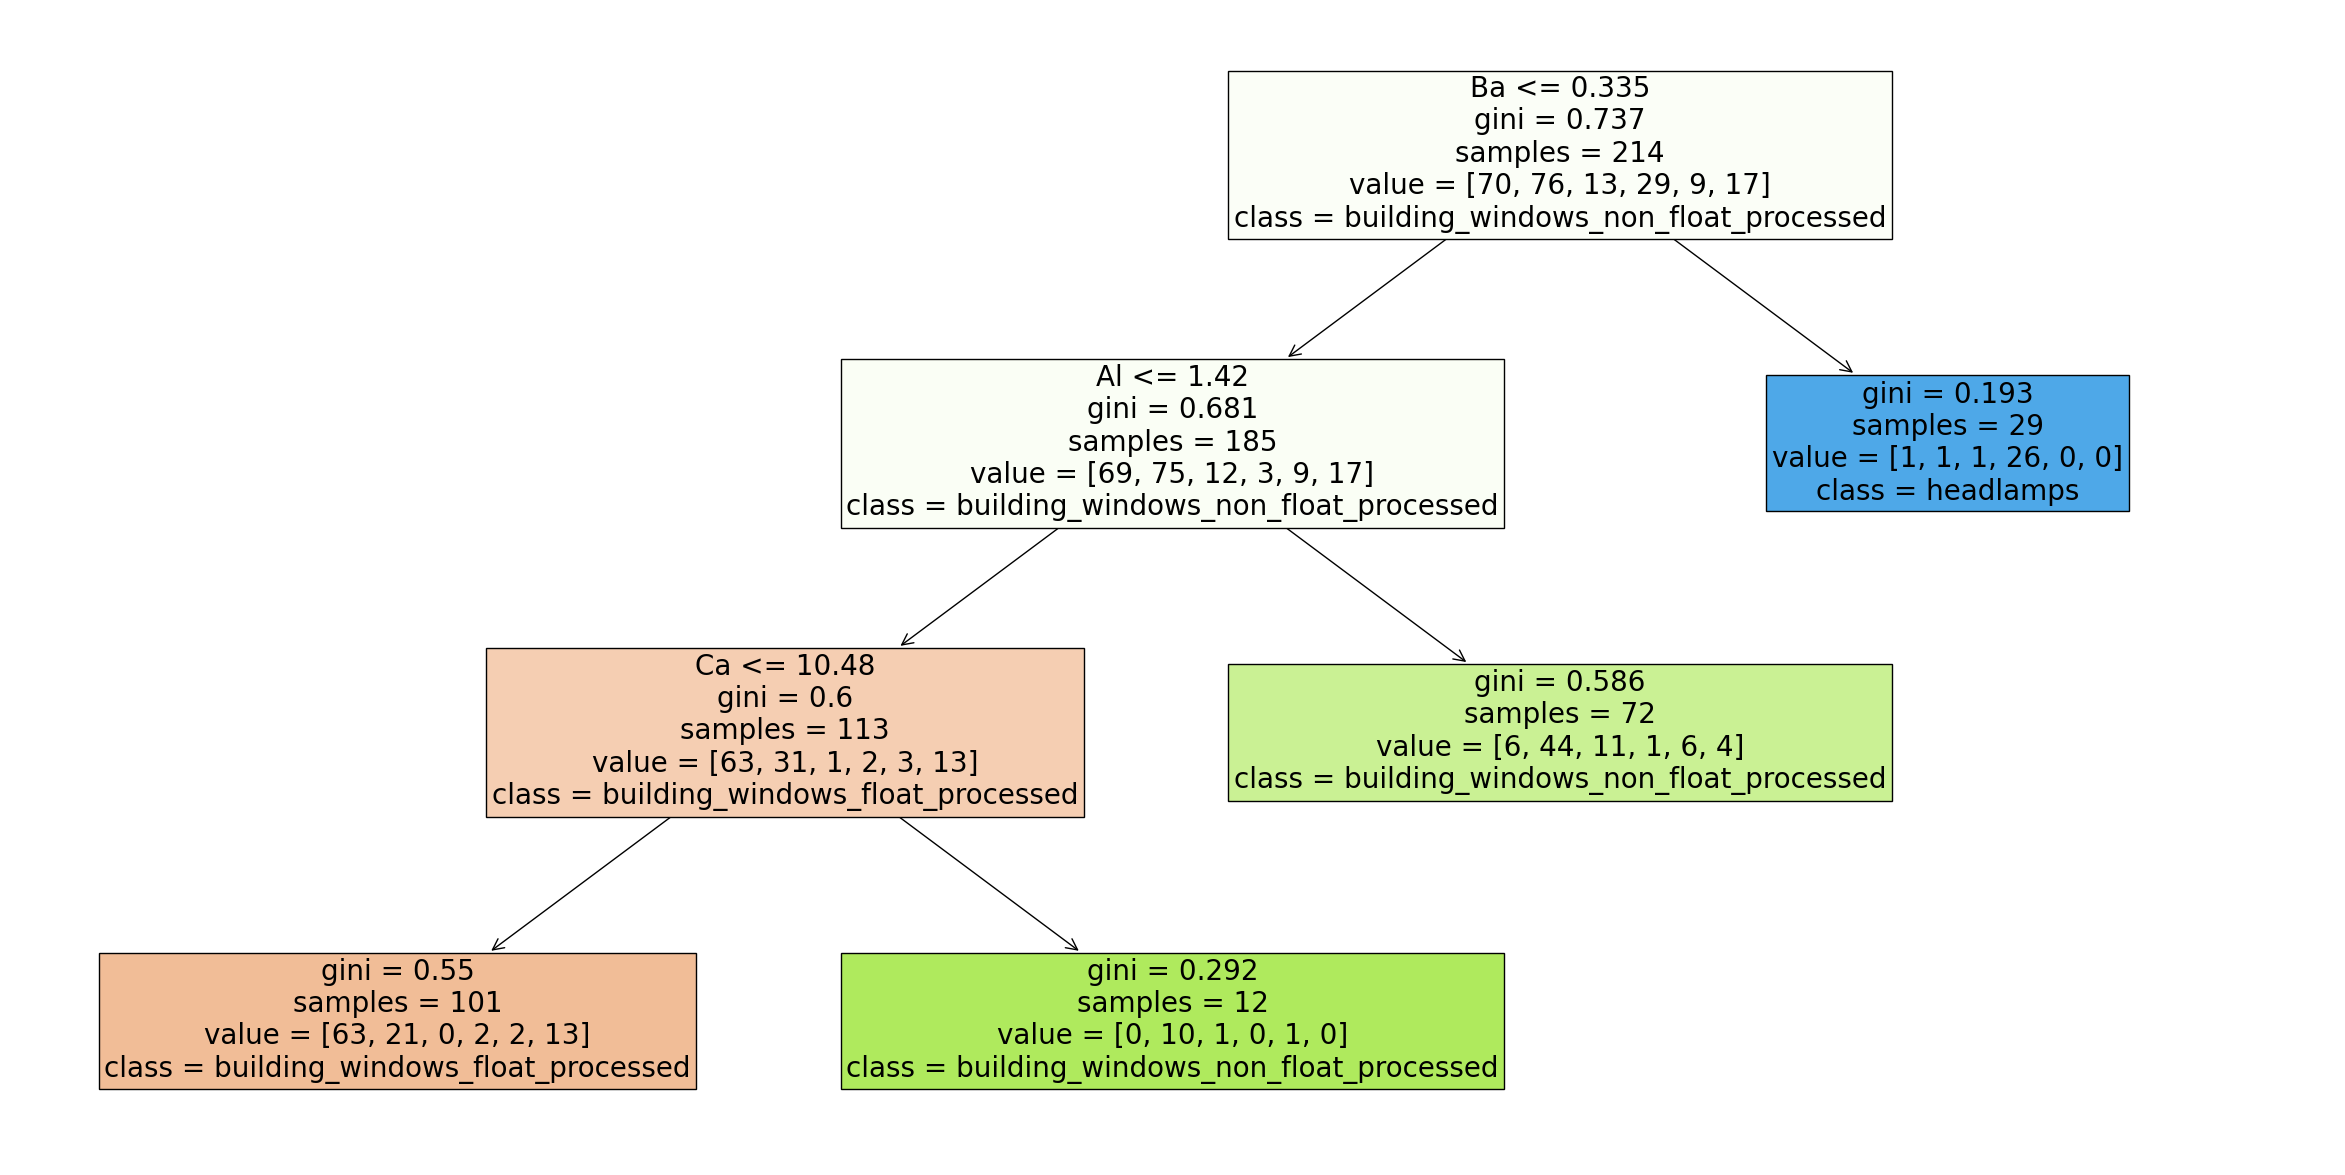

In [58]:
plt.figure(figsize=(30,15))
plot_tree(bm_tree,feature_names=list(X.columns),
         class_names = list(le.classes_),
         filled=True,fontsize=20)
plt.show()

In [59]:
# Inferencing
tst_glass = pd.read_csv("tst_Glass.csv")
predictions = bm_tree.predict(tst_glass)
print(predictions)

[3 0 3 3 3]


In [60]:
#decode above list
le.inverse_transform(predictions)

array(['headlamps', 'building_windows_float_processed', 'headlamps',
       'headlamps', 'headlamps'], dtype=object)

In [71]:
# Print the mapping of labels to categories
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", label_mapping)

Label Mapping: {'building_windows_float_processed': 0, 'building_windows_non_float_processed': 1, 'containers': 2, 'headlamps': 3, 'tableware': 4, 'vehicle_windows_float_processed': 5}


In [72]:
mapl = pd.DataFrame(le.classes_,np.arange(0,len(le.classes_)))
mapl

,0
0,building_windows_float_processed
1,building_windows_non_float_processed
2,containers
3,headlamps
4,tableware
5,vehicle_windows_float_processed
